In [356]:
################# Titanic Survival competition ##########
# 1.Question or problem definition.
# 2. Acquire training and testing data.
# 3. Wrangle, prepare, cleanse the data.
# 4. Analyze, identify patterns, and explore the data.
# 5. Model, predict and solve the problem.
# 6. Visualize, report, and present the problem solving steps and final solution.
# 7. Supply or submit the results.

In [413]:
################# Exploratory data analysis #############
# 1. Correlating - How well does each feature correlate with Survival.
# 2. Completing - Fill null values
# 3. Correcting Drop unwanted feature.
# 4. Creating - Create a new feature.
# 5. Classifying - Consider features based on implications or correlation with Survival.

import pandas as pd
import random as rnd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# ML models

from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier


In [374]:
# Read the datasets

train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
combine = [train_df,test_df]
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [375]:
# Categorical features: Survived, Sex, and Embarked. Ordinal: Pclass.
# Continous features : Age, Fare. Discrete: SibSp, Parch.
# Features contain blank, null or empty values
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [376]:
#Distribution of numerical feature values across the samples
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [377]:
# Distribution of categorical features
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Silven, Miss. Lyyli Karoliina",male,347082,G6,S
freq,1,577,7,4,644


In [378]:
# Analyze by pivoting features - 63% of Pclass 1 paasengers survived
train_df[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by ='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [379]:
#- 74% of Female paasengers survived
train_df[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


/Users/jramakrishna/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


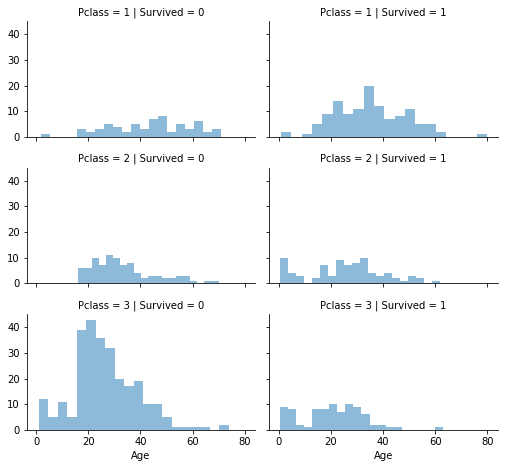

In [380]:
# Analyze by visualizing data
# Correlating numerical and ordinal features - Age - Infants and older people survived more
grid = sns.FacetGrid(train_df, col='Survived', row ='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

/Users/jramakrishna/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/jramakrishna/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


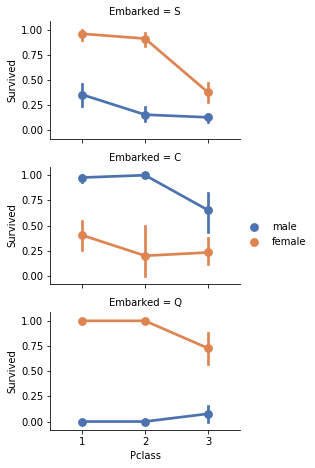

In [381]:
# Correlating categorical features
grid_cat = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid_cat.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid_cat.add_legend()


In [382]:
######### Wrangle data ##############
# Correcting by dropping unwanted features - drop the Name, PassengerId, Cabin and Ticket features
print('Before', train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)
train_df = train_df.drop(['Ticket','Cabin','Name', 'PassengerId'],axis=1)
test_df = test_df.drop(['Ticket','Cabin','Name'],axis=1)
combine = [train_df,test_df]

"after", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('after', (891, 8), (418, 8), (891, 8), (418, 8))

In [383]:
#Create new feature (IsAlone) combining existing features
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
for dataset in combine:
    dataset['IsAlone']= 0
    dataset.loc[dataset['FamilySize'] == 1 , 'IsAlone'] = 1

train_df = train_df.drop(['SibSp','Parch','FamilySize'], axis = 1)
test_df = test_df.drop(['SibSp','Parch','FamilySize'], axis = 1)
combine = [train_df,test_df]
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index= False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [384]:
# Completing a categorical feature (Embarked) - fillna with frequent value
freq_port = train_df.Embarked.dropna().mode()[0]
print(freq_port)
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

train_df[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(by=['Survived'], ascending = False)

S


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [385]:
# Converting categorical feature to numeric - Sex & Embarked
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female': 1, 'male': 0}).astype(int)
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,0,3,0,22.0,7.2500,0,0
1,1,1,1,38.0,71.2833,1,0
2,1,3,1,26.0,7.9250,0,1
3,1,1,1,35.0,53.1000,0,0
4,0,3,0,35.0,8.0500,0,1


In [386]:
# Completing a numeric feature: Fare - fillna with frequent value and Age - fillna with mean value. 
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
train_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)

test_df['Age'].fillna(test_df['Age'].dropna().mean(), inplace=True)
train_df['Age'].fillna(test_df['Age'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,892,3,0,34.5,7.8292,2,1
1,893,3,1,47.0,7.0000,0,0
2,894,2,0,62.0,9.6875,2,1
3,895,3,0,27.0,8.6625,0,1
4,896,3,1,22.0,12.2875,0,0


In [387]:
# Pclass, Sex, Age, Fare, Embarked, IsAlone Features are selected based on below observations made during EDA:
#Women (Sex=female) were more likely to have survived.
#Children (Age<?) were more likely to have survived.
#The upper-class passengers (Pclass=1) were more likely to have survived.
#Port of embarkation correlates with survival rates

In [389]:
# Train and test split of dataset

X_train = train_df.drop(['Survived'],axis=1)
Y_train = train_df['Survived']
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 6), (891,), (418, 6))

In [ ]:
############ Model, predict and solve #######################

In [397]:
# 1. Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train,Y_train) * 100, 2)
acc_log

79.01

In [398]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.488300
4,Embarked,0.327293
5,IsAlone,0.036495
3,Fare,0.000364
2,Age,-0.033889
0,Pclass,-1.156323


In [399]:
# 2. KNN or k-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train,Y_train) * 100, 2)
acc_knn

83.05

In [401]:
# 3. Support Vector Machines
svm = SVC()
svm.fit(X_train,Y_train)
Y_pred = svm.predict(X_test)
acc_svm = round(svm.score(X_train,Y_train) * 100, 2)
acc_svm

68.24

In [403]:
# 4. Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

78.11

In [405]:
# 5. Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree


98.2

In [409]:
# 6. Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

98.2

In [414]:
# 7. Artificial neural network
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

73.96

In [421]:
########### Model evaluation #############

models = pd.DataFrame({
    'model' : ['Logistic Regression', 'KNN', 'Support Vector Machines', 'Naive Bayes', 'Decision Tree',
              'Random Forest', 'ANN'],
    'score' : [acc_log, acc_knn, acc_svm, acc_gaussian, acc_decision_tree,
              acc_random_forest, acc_sgd]})

models.sort_values(by ='score', ascending = False)

,model,score
4,Decision Tree,98.20
5,Random Forest,98.20
1,KNN,83.05
0,Logistic Regression,79.01
3,Naive Bayes,78.11
6,ANN,73.96
2,Support Vector Machines,68.24


In [423]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('output/submission.csv', index=False)